## Importing the Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
hr_df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/master/ibm-hr-analytics-employee-attrition-performance.zip')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Exploration

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr_df.shape

(1470, 35)

In [5]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
hr_df.dropna(inplace=True)

## Data Visualization

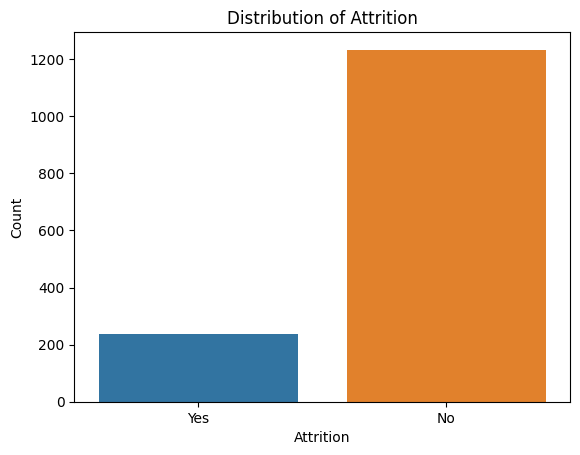

In [9]:
sb.countplot(data=hr_df, x='Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition')
plt.show()

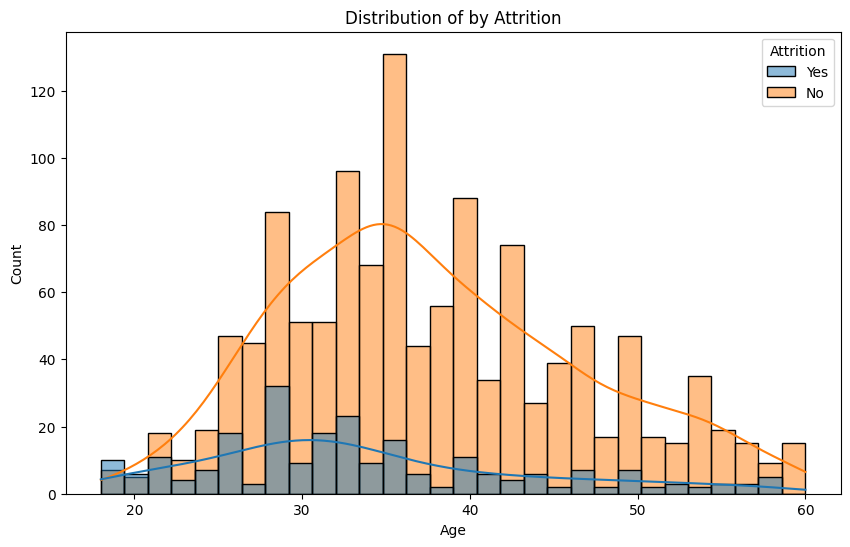

In [10]:
plt.figure(figsize=(10,6))
sb.histplot(data=hr_df, x='Age', hue='Attrition', bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of by Attrition')
plt.show()

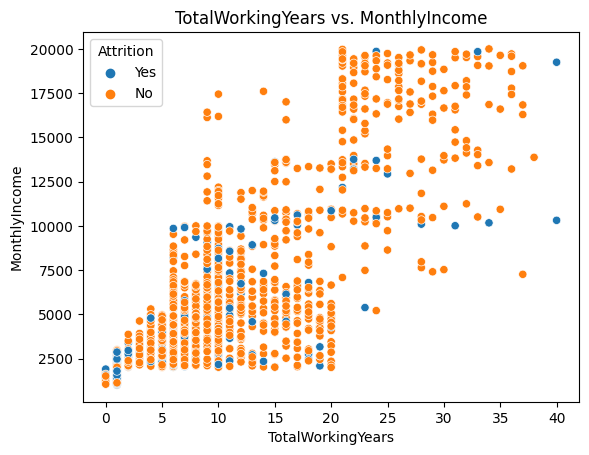

In [11]:
sb.scatterplot(data=hr_df, x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.title('TotalWorkingYears vs. MonthlyIncome')
plt.show()

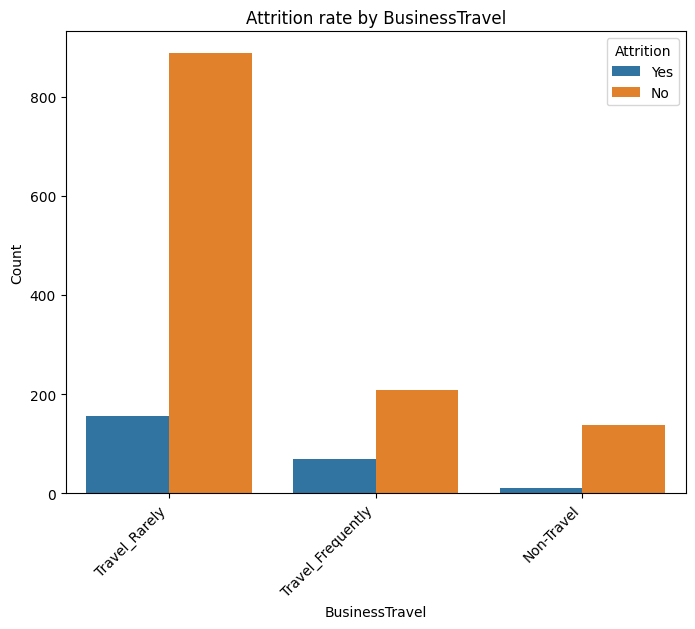

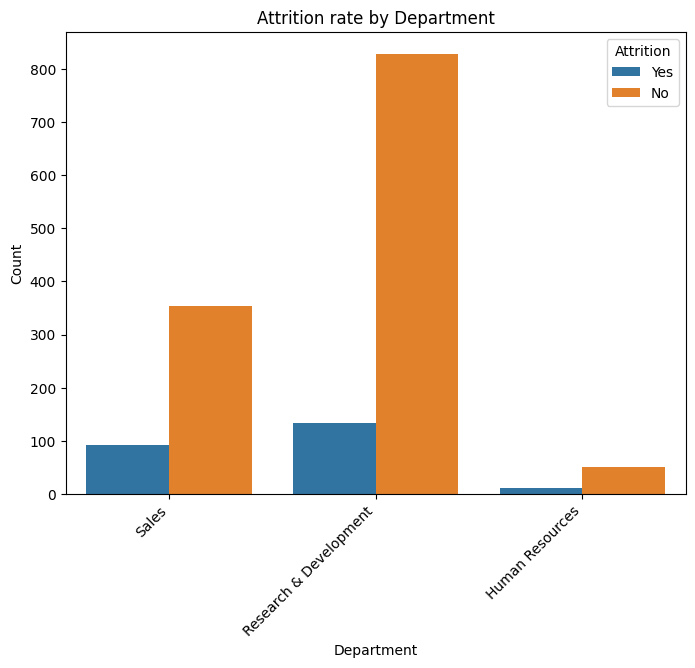

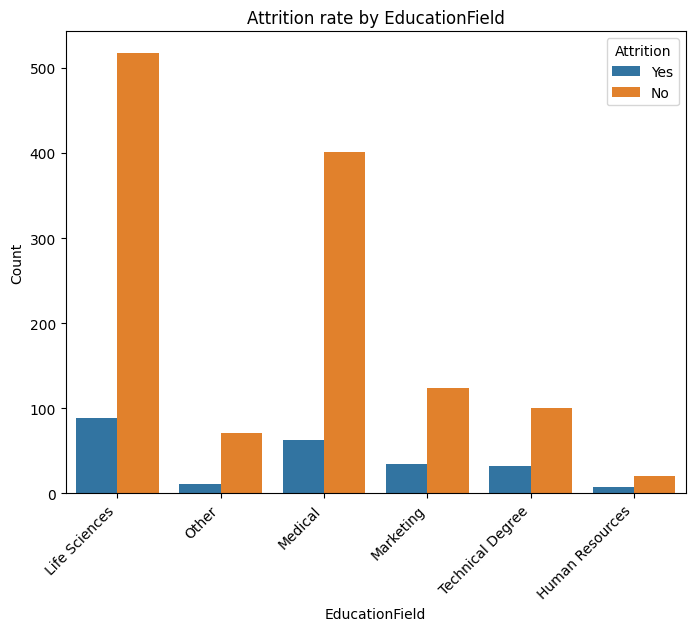

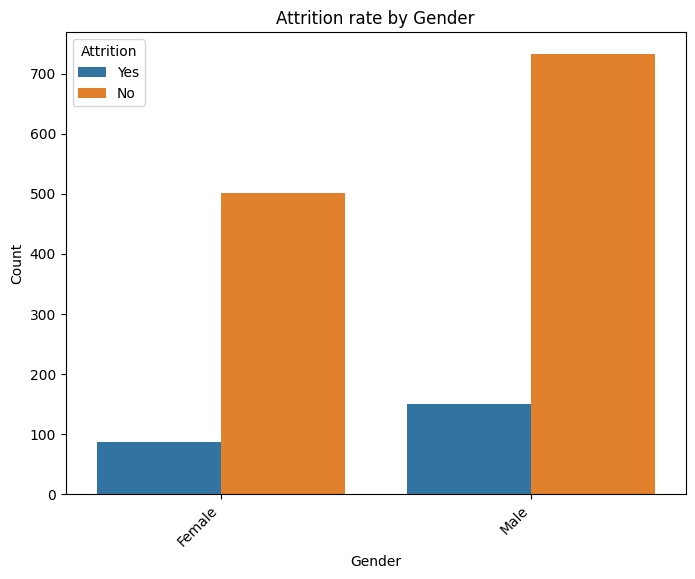

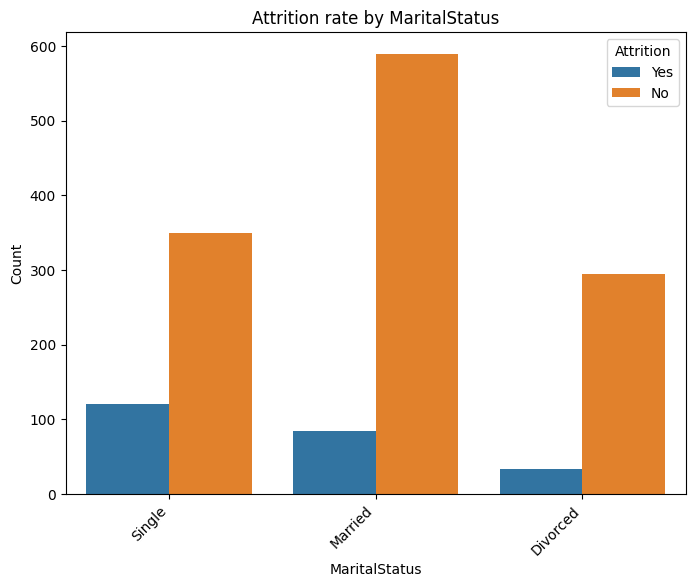

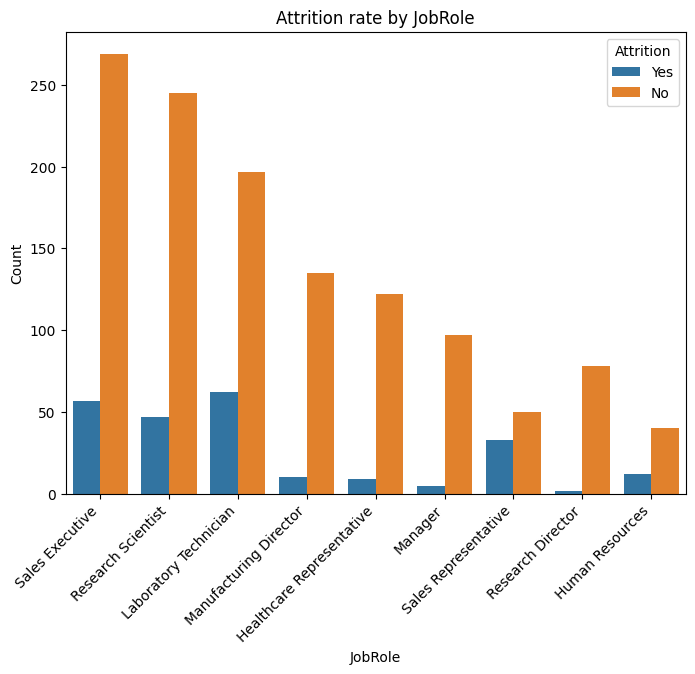

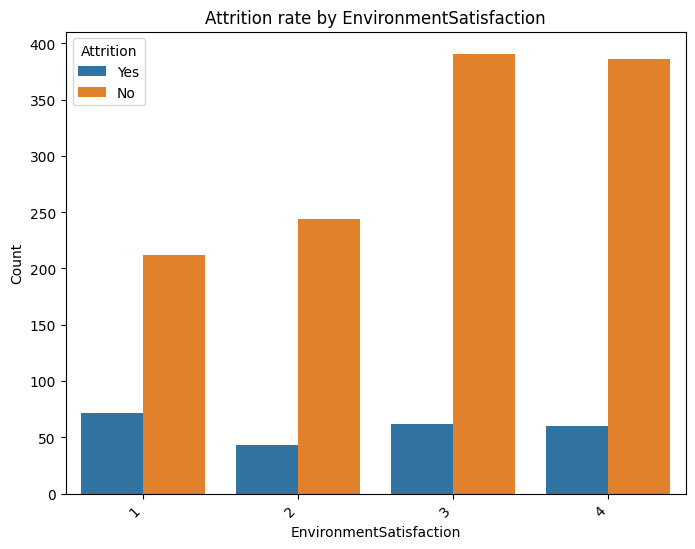

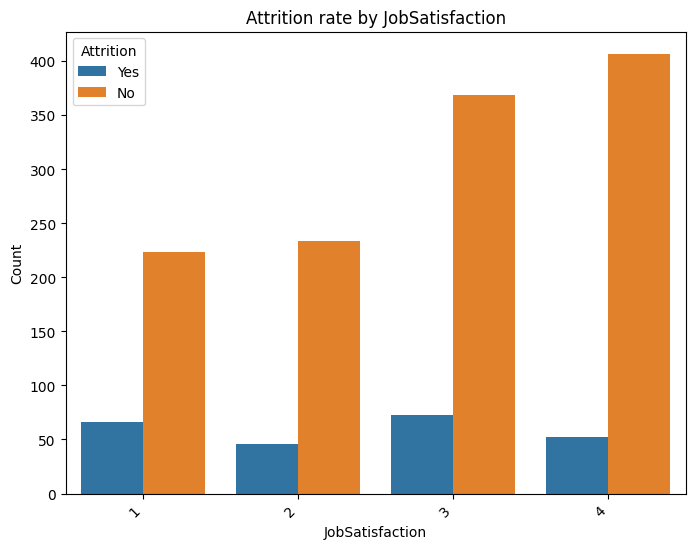

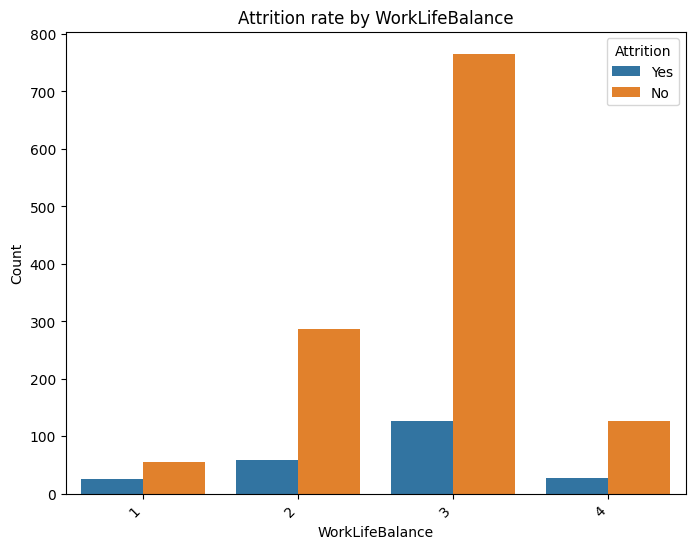

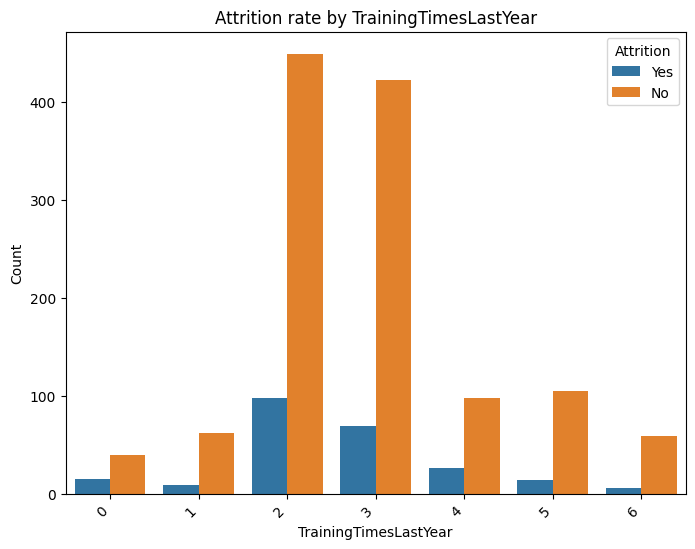

In [12]:
att_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus',
            'JobRole', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'TrainingTimesLastYear']

for i, j in enumerate(att_cols, 1):
  plt.figure(figsize=(8,6))
  sb.countplot(data=hr_df, x=j, hue='Attrition')
  plt.xlabel(j)
  plt.ylabel('Count')
  plt.title(f'Attrition rate by {j}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

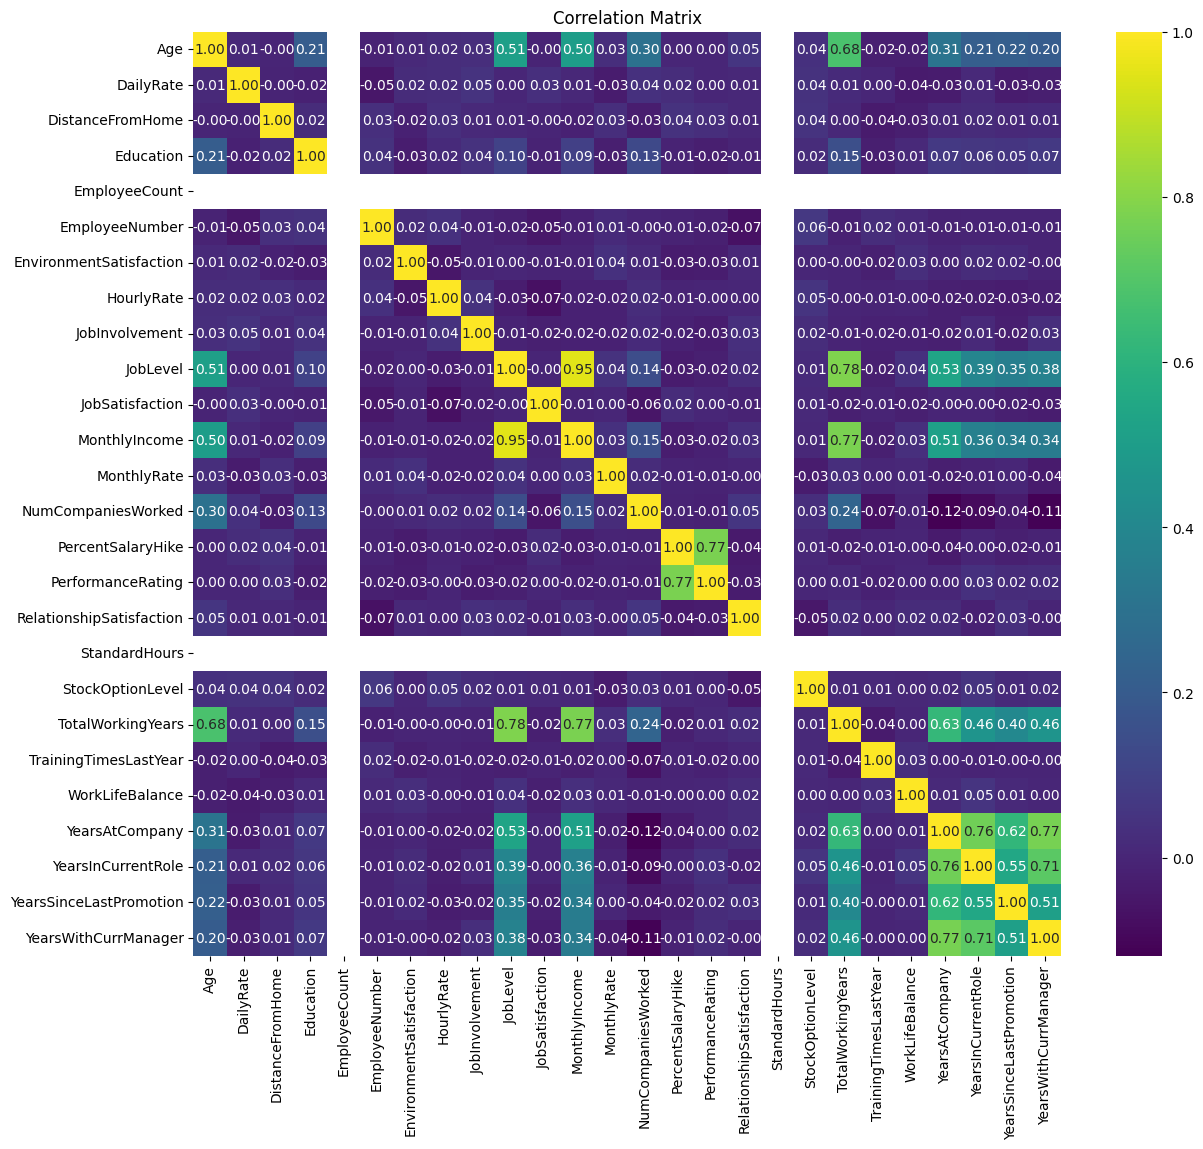

In [13]:
corr_matrix = hr_df.corr()

plt.figure(figsize=(14,12))
sb.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Attrition Analysis

In [14]:
overall_attrition_rate = hr_df['Attrition'].value_counts(normalize=True) * 100
print("Overall Attrition Rate:")
print(overall_attrition_rate)

Overall Attrition Rate:
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [15]:
jobrole_attrition_rate = hr_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Attrition Rate by Job Role:")
print(jobrole_attrition_rate)

Attrition Rate by Job Role:
Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


In [16]:
dept_attrition_rate = hr_df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Attrition Rate by Department:")
print(dept_attrition_rate)

Attrition Rate by Department:
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [17]:
TotalWorkingYears_attrition_rate = hr_df.groupby('TotalWorkingYears')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Attrition Rate by Total Working Years:")
print(TotalWorkingYears_attrition_rate)

Attrition Rate by Total Working Years:
Attrition                  No         Yes
TotalWorkingYears                        
0                   54.545455   45.454545
1                   50.617284   49.382716
2                   70.967742   29.032258
3                   78.571429   21.428571
4                   80.952381   19.047619
5                   81.818182   18.181818
6                   82.400000   17.600000
7                   77.777778   22.222222
8                   84.466019   15.533981
9                   89.583333   10.416667
10                  87.623762   12.376238
11                  80.555556   19.444444
12                  89.583333   10.416667
13                  91.666667    8.333333
14                  87.096774   12.903226
15                  87.500000   12.500000
16                  91.891892    8.108108
17                  90.909091    9.090909
18                  85.185185   14.814815
19                  86.363636   13.636364
20                  93.333333    6.66

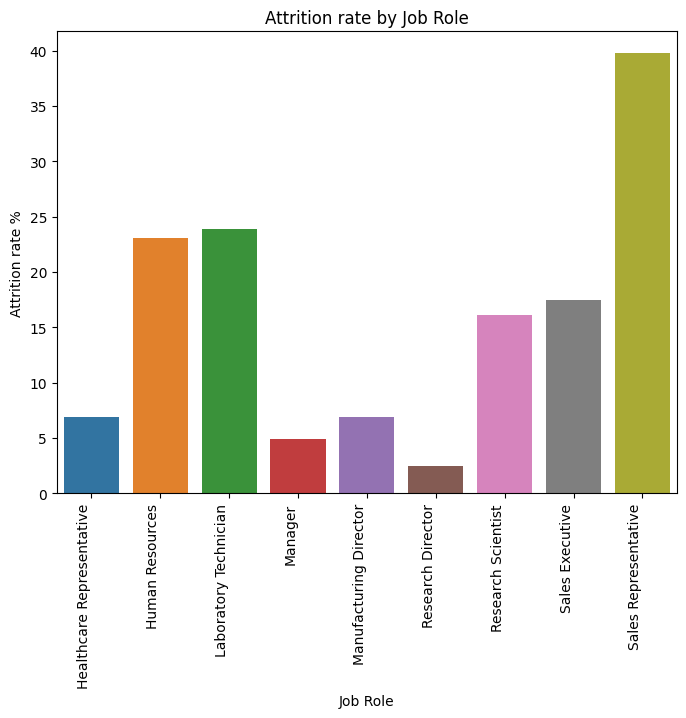

In [18]:
plt.figure(figsize=(8,6))
sb.barplot(data=jobrole_attrition_rate.reset_index(), x='JobRole', y='Yes')
plt.xlabel('Job Role')
plt.ylabel('Attrition rate %')
plt.title('Attrition rate by Job Role')
plt.xticks(rotation=90, ha='right')
plt.show()

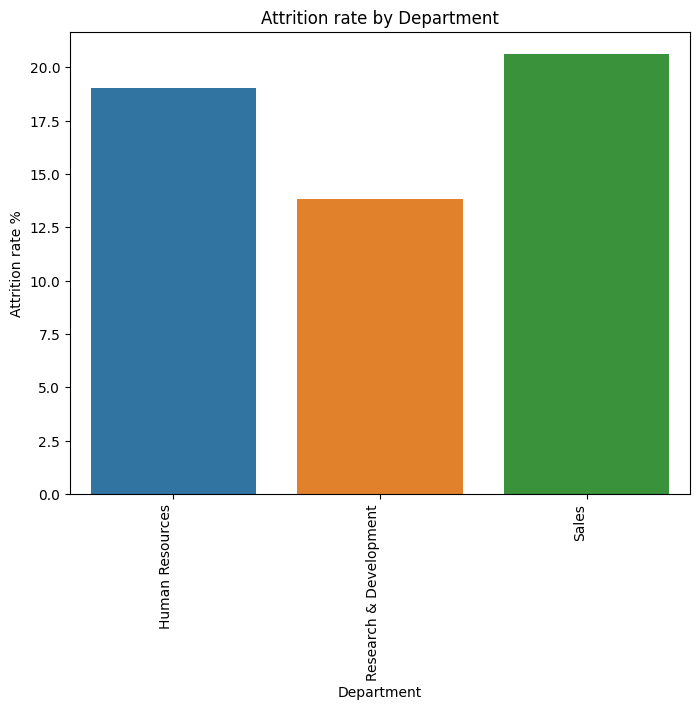

In [19]:
plt.figure(figsize=(8,6))
sb.barplot(data=dept_attrition_rate.reset_index(), x='Department', y='Yes')
plt.xlabel('Department')
plt.ylabel('Attrition rate %')
plt.title('Attrition rate by Department')
plt.xticks(rotation=90, ha='right')
plt.show()

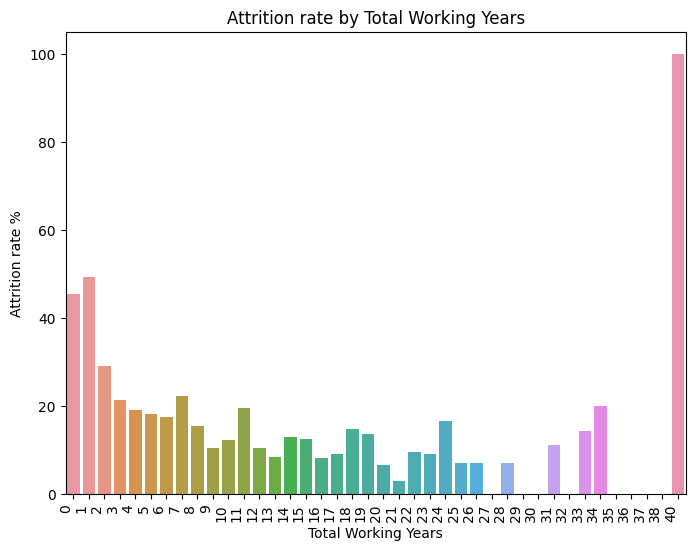

In [20]:
plt.figure(figsize=(8,6))
sb.barplot(data=TotalWorkingYears_attrition_rate.reset_index(), x='TotalWorkingYears', y='Yes')
plt.xlabel('Total Working Years')
plt.ylabel('Attrition rate %')
plt.title('Attrition rate by Total Working Years')
plt.xticks(rotation=90, ha='right')
plt.show()

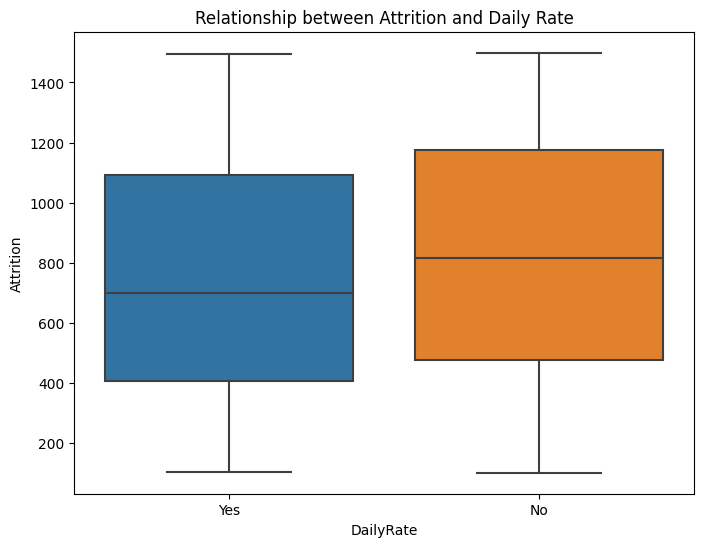

In [21]:
plt.figure(figsize=(8,6))
sb.boxplot(data=hr_df, x='Attrition', y='DailyRate')
plt.xlabel('DailyRate')
plt.ylabel('Attrition')
plt.title('Relationship between Attrition and Daily Rate')
plt.show()

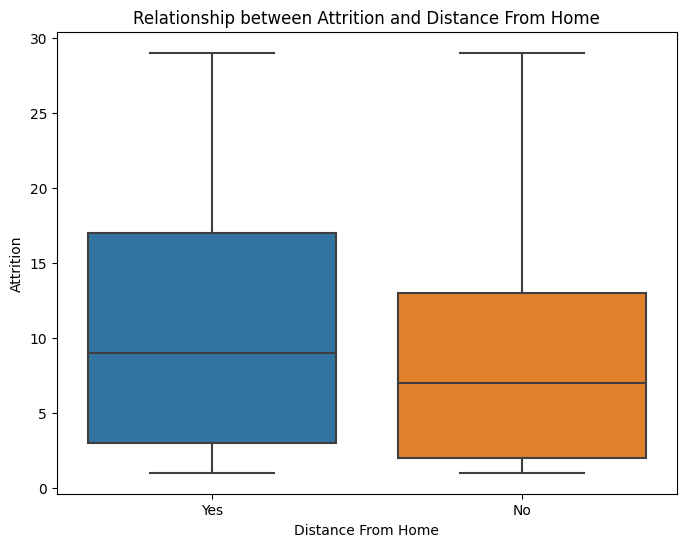

In [22]:
plt.figure(figsize=(8,6))
sb.boxplot(data=hr_df, x='Attrition', y='DistanceFromHome')
plt.xlabel('Distance From Home')
plt.ylabel('Attrition')
plt.title('Relationship between Attrition and Distance From Home')
plt.show()

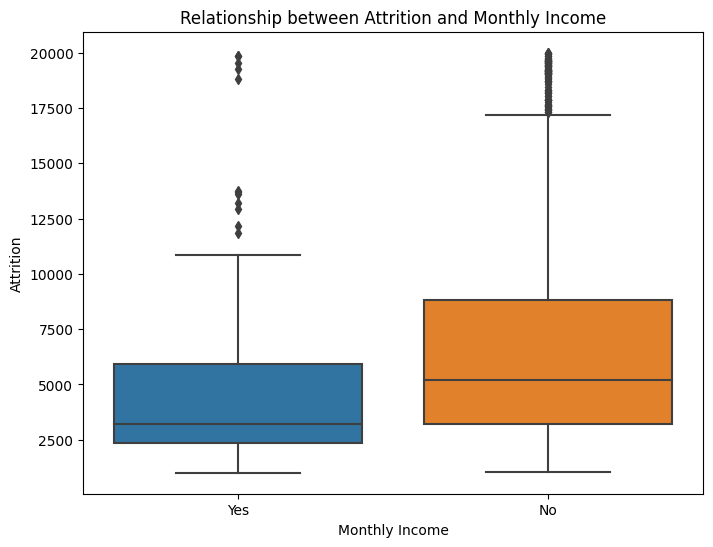

In [23]:
plt.figure(figsize=(8,6))
sb.boxplot(data=hr_df, x='Attrition', y='MonthlyIncome')
plt.xlabel('Monthly Income')
plt.ylabel('Attrition')
plt.title('Relationship between Attrition and Monthly Income')
plt.show()

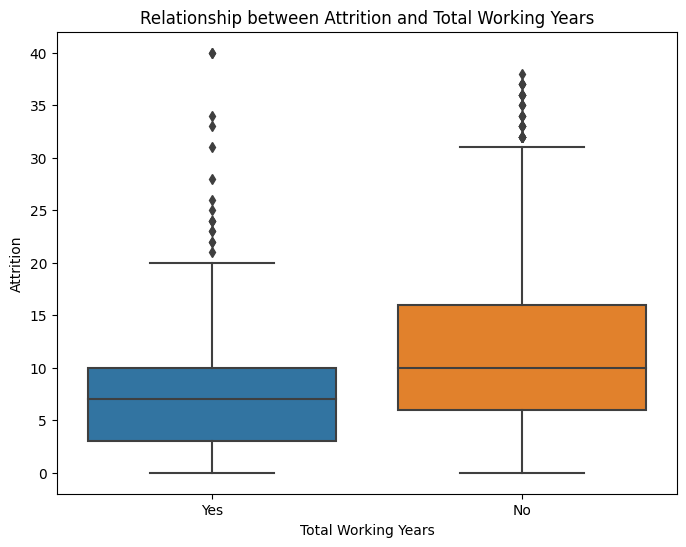

In [24]:
plt.figure(figsize=(8,6))
sb.boxplot(data=hr_df, x='Attrition', y='TotalWorkingYears')
plt.xlabel('Total Working Years')
plt.ylabel('Attrition')
plt.title('Relationship between Attrition and Total Working Years')
plt.show()

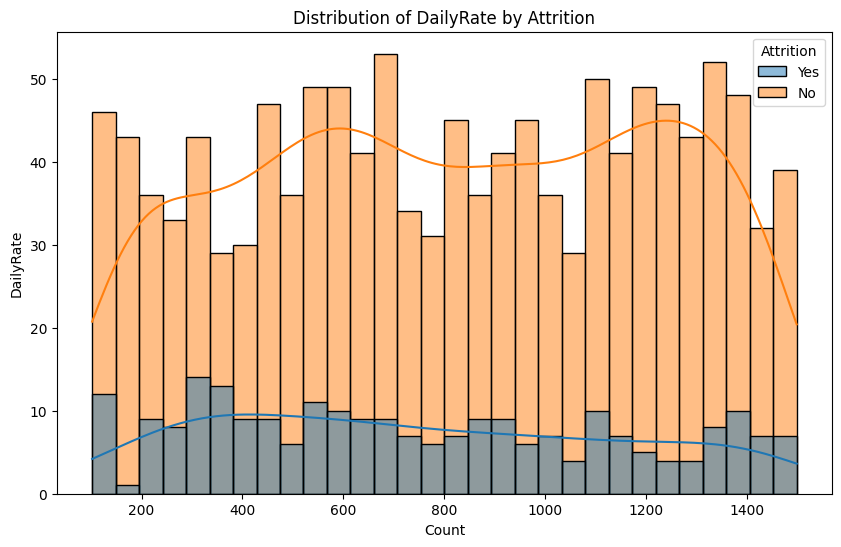

In [25]:
plt.figure(figsize=(10,6))
sb.histplot(data=hr_df, x='DailyRate', hue='Attrition', bins=30, kde=True)
plt.xlabel('Count')
plt.ylabel('DailyRate')
plt.title('Distribution of DailyRate by Attrition')
plt.show()

# Data Preprocessing and Encoding

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

hr_df_e = pd.get_dummies(hr_df, drop_first=True)

In [27]:
hr_df_e.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

In [28]:
X = hr_df_e.drop('Attrition_Yes', axis=1)
y = hr_df_e['Attrition_Yes']

## Model Training and Evaluation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m_lr = LogisticRegression()
m_lr.fit(X_train, y_train)

y_pred_lr = m_lr.predict(X_test)
print("Claasification Report - LogisticRegression\n")
print(classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Claasification Report - LogisticRegression

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Accuracy: 0.8673469387755102


In [30]:
m_dt = DecisionTreeClassifier()
m_dt.fit(X_train, y_train)

y_pred_dt = m_dt.predict(X_test)
print("Claasification Report - DecisionTreeClassifier\n")
print(classification_report(y_test, y_pred_dt))

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Claasification Report - DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       255
           1       0.17      0.21      0.19        39

    accuracy                           0.77       294
   macro avg       0.52      0.53      0.53       294
weighted avg       0.78      0.77      0.77       294

Accuracy: 0.7653061224489796


In [31]:
m_rf = RandomForestClassifier()
m_rf.fit(X_train,y_train)

y_pred_rf = m_rf.predict(X_test)

print("Claasification Report - RandomForestClassifier\n")
print(classification_report(y_test, y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Claasification Report - RandomForestClassifier

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

Accuracy: 0.8741496598639455


In [32]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix - Random Forest Classifier\n")
print(con_mat)

Confusion Matrix - Random Forest Classifier

[[253   2]
 [ 35   4]]


*Based on the classifaction report, Random Forest Classifier has better metrics. Hence choosing it for evaluation*

Plotting ROC Curve and Precision Recall Curve

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_rf)
pr_auc = auc(recall, precision)

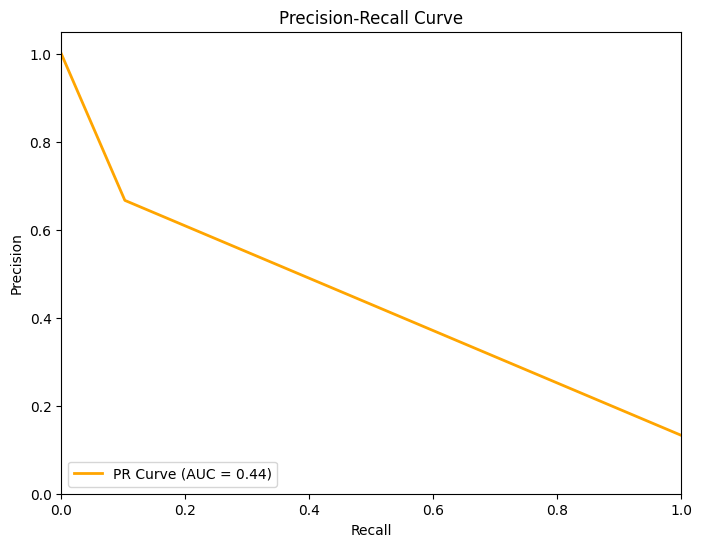

In [34]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='orange', lw=2, label='PR Curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

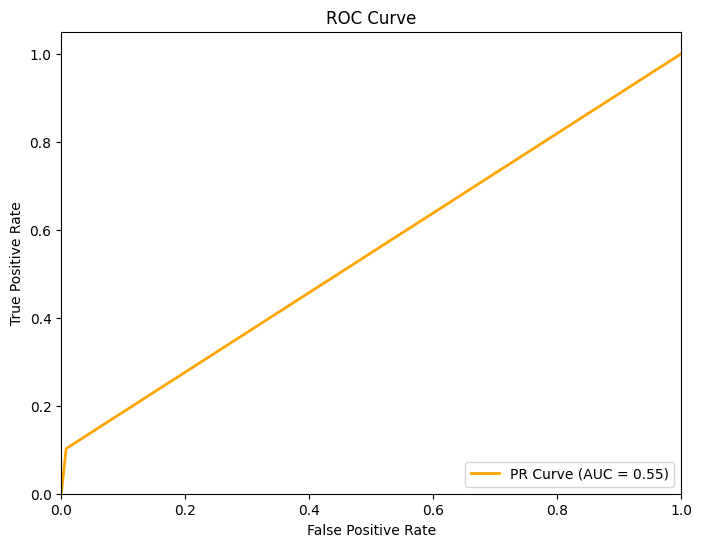

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label='PR Curve (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Hyperparamter Tuning for Random Forest Classifier

In [36]:
from sklearn.model_selection import RandomizedSearchCV
param_d = {
    'n_estimators': [50,100,200],
    'max_depth': [None,5,10,20],
    'min_samples_leaf': [1,2,4]
}

random_search = RandomizedSearchCV(estimator = m_rf, param_distributions = param_d, cv =5, n_iter=5, scoring='accuracy')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print('Best Hyperparameters:', best_params)

best_model = random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 50, 'min_samples_leaf': 2, 'max_depth': 10}


In [37]:
y_pred_m = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_m)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_m))

con_matrix = confusion_matrix(y_test, y_pred_m)
print("Confusion Matrix:")
print(con_matrix)

Accuracy: 0.8775510204081632
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294

Confusion Matrix:
[[253   2]
 [ 34   5]]


Loading the Model

In [38]:
import joblib

input_data = hr_df_e.iloc[100].to_dict()

input_df = pd.DataFrame([input_data])
selected_col = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']

input_dfe = input_df[selected_col]


Making the prediction

In [40]:
model_fname = 'model_hr.pkl'
joblib.dump(best_model,model_fname)
model_final = joblib.load('model_hr.pkl')

prediction = model_final.predict(input_dfe)

print("\nPrediction:")
if prediction[0] == 0:
  print("No Attrition")
else:
  print("Attrition")


Prediction:
Attrition
